In [3]:
%matplotlib ipympl

# Horizontal + Vertical 

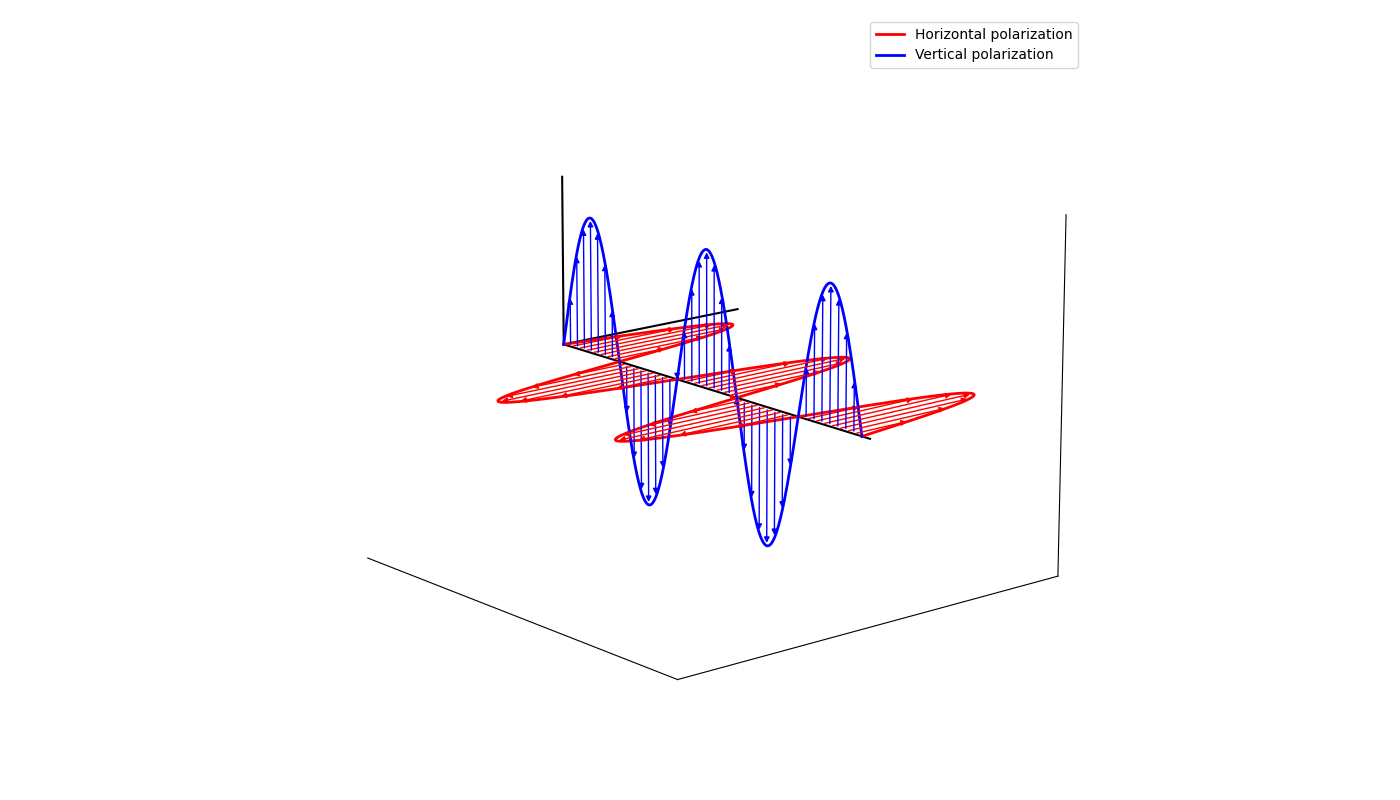

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

# Custom 3D arrow class for better-looking arrows
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)

# Create figure
fig = plt.figure(figsize=(14, 8), facecolor='white')
ax = fig.add_subplot(111, projection='3d')

# Common parameters
z = np.linspace(0, 12, 1000)
wavelength = 4.8
amplitude = 2.0

# Calculate E and B field values
E = amplitude * np.sin(2 * np.pi * z / wavelength)
B = amplitude * np.sin(2 * np.pi * z / wavelength)

# Draw axis
ax.plot([0, 12.3], [0, 0], [0, 0], 'k-', lw=1.5)
ax.plot([0, 0], [0, 2.5], [0, 0], 'k-', lw=1.5)
ax.plot([0, 0], [0, 0], [0, 2.5], 'k-', lw=1.5)
# ax.text(12.3, 0, 0, 'z', fontsize=14, fontweight='bold')


ax.plot(z, E, np.zeros_like(z), 'r-', lw=2, label="Horizontal polarization")
ax.plot(z, np.zeros_like(z), B, 'b-', lw=2, label="Vertical polarization")

# Add arrows for E field (more of them for a better visualization)
arrow_positions = np.linspace(0.3, 12, 40)
for pos in arrow_positions:
    # Get field value at this position
    field_val = amplitude * np.sin(2 * np.pi * pos / wavelength)
    
    # Create and add arrow for E field
    e_arrow = Arrow3D([pos, pos], [0, field_val], [0, 0], mutation_scale=8, lw=1, arrowstyle='-|>', color='r')
    ax.add_artist(e_arrow)
    
    # Create and add arrow for B field
    b_arrow = Arrow3D([pos, pos], [0, 0], [0, field_val], mutation_scale=8, lw=1, arrowstyle='-|>', color='b')
    ax.add_artist(b_arrow)

# Set axes properties
ax.set_xlim(0, 12.3)
ax.set_ylim(-2.5, 2.5)
ax.set_zlim(-2.5, 2.5)

# Remove tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

# Remove tick marks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Remove grid and background planes to match TikZ clean look
ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

# Set view angle to better match TikZ example
ax.view_init(elev=15, azim=-40)
ax.legend()

# Tight layout and show
plt.tight_layout()
# plt.savefig('polarization_wave.png', dpi=300, bbox_inches='tight')
plt.show()

# Circular

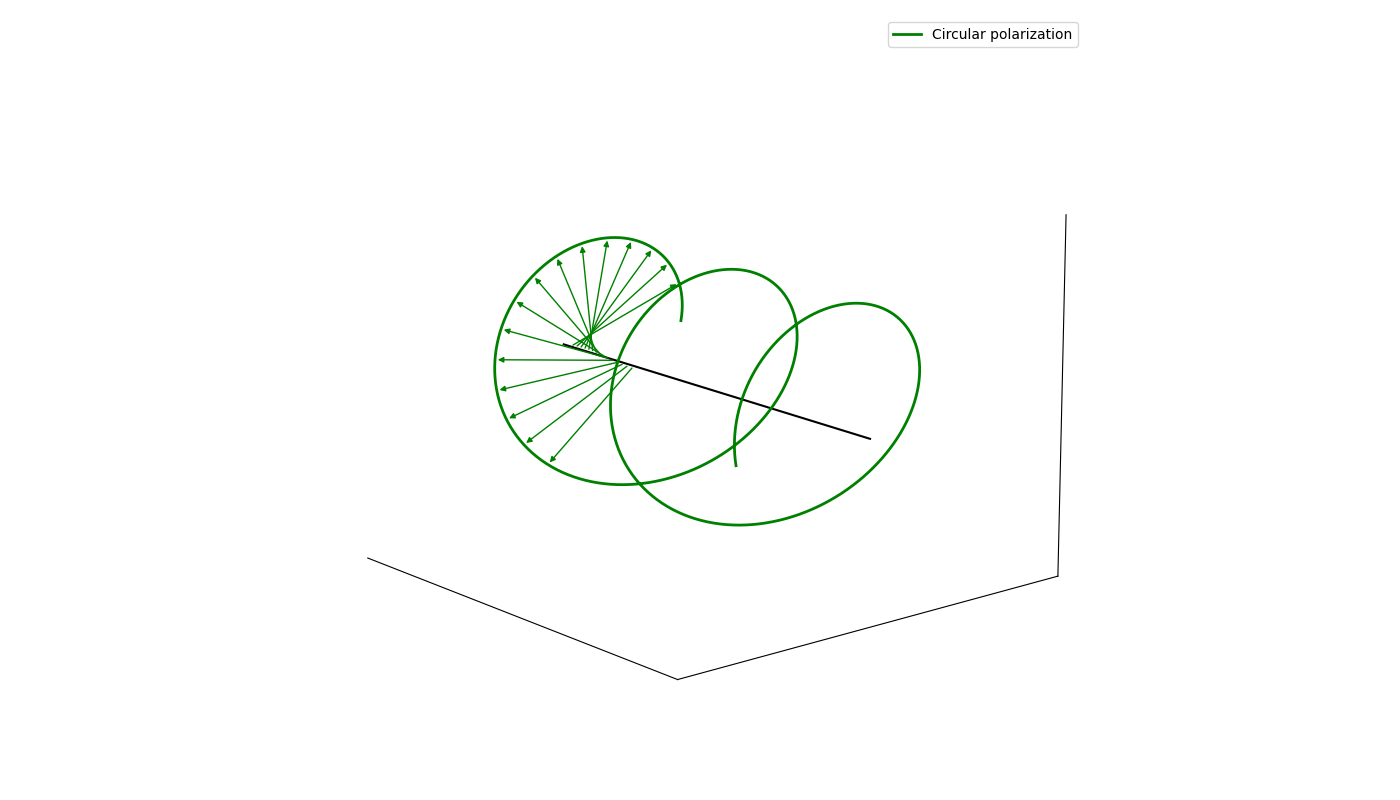

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

# Custom 3D arrow class for better-looking arrows
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)

# Create figure
fig = plt.figure(figsize=(14, 8), facecolor='white')
ax = fig.add_subplot(111, projection='3d')

# Parameters
x = np.linspace(0, 12, 1000)  # Propagation direction (x-axis)
wavelength = 4.8
amplitude = 2.0

# Circular polarization: Electric field rotates in the y-z plane
E_y = amplitude * np.cos(2 * np.pi * x / wavelength)
E_z = amplitude * np.sin(2 * np.pi * x / wavelength)

# Plot the propagation axis (x-axis) in green
ax.plot([0, 12.3], [0, 0], [0, 0], color='black', lw=1.5)
ax.plot([0, 0], [0, 2.5], [0, 0], 'k-', lw=1.5)
ax.plot([0, 0], [0, 0], [0, 2.5], 'k-', lw=1.5)

# Plot the helix representing the tip of the electric field vector in green
ax.plot(x, E_y, E_z, color='green', lw=2, label="Circular polarization")

# Add arrows along the helix for visualization (using 30 arrows)
arrow_positions = np.linspace(0.3, 3, 15)
for pos in arrow_positions:
    field_y = amplitude * np.cos(2 * np.pi * pos / wavelength)
    field_z = amplitude * np.sin(2 * np.pi * pos / wavelength)
    e_arrow = Arrow3D([pos, pos], [0, field_y], [0, field_z],
                        mutation_scale=8, lw=1, arrowstyle='-|>', color='green')
    ax.add_artist(e_arrow)

# Set axes limits
ax.set_xlim(0, 12.3)
ax.set_ylim(-amplitude * 1.5, amplitude * 1.5)
ax.set_zlim(-amplitude * 1.5, amplitude * 1.5)

# Remove tick labels and ticks for a clean look
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Remove grid and background panes for a clean style
ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

# Set view angle
ax.view_init(elev=15, azim=-40)
ax.legend()

plt.tight_layout()
# plt.savefig('circular_polarization_wave_green.png', dpi=300, bbox_inches='tight')
plt.show()


# linear 

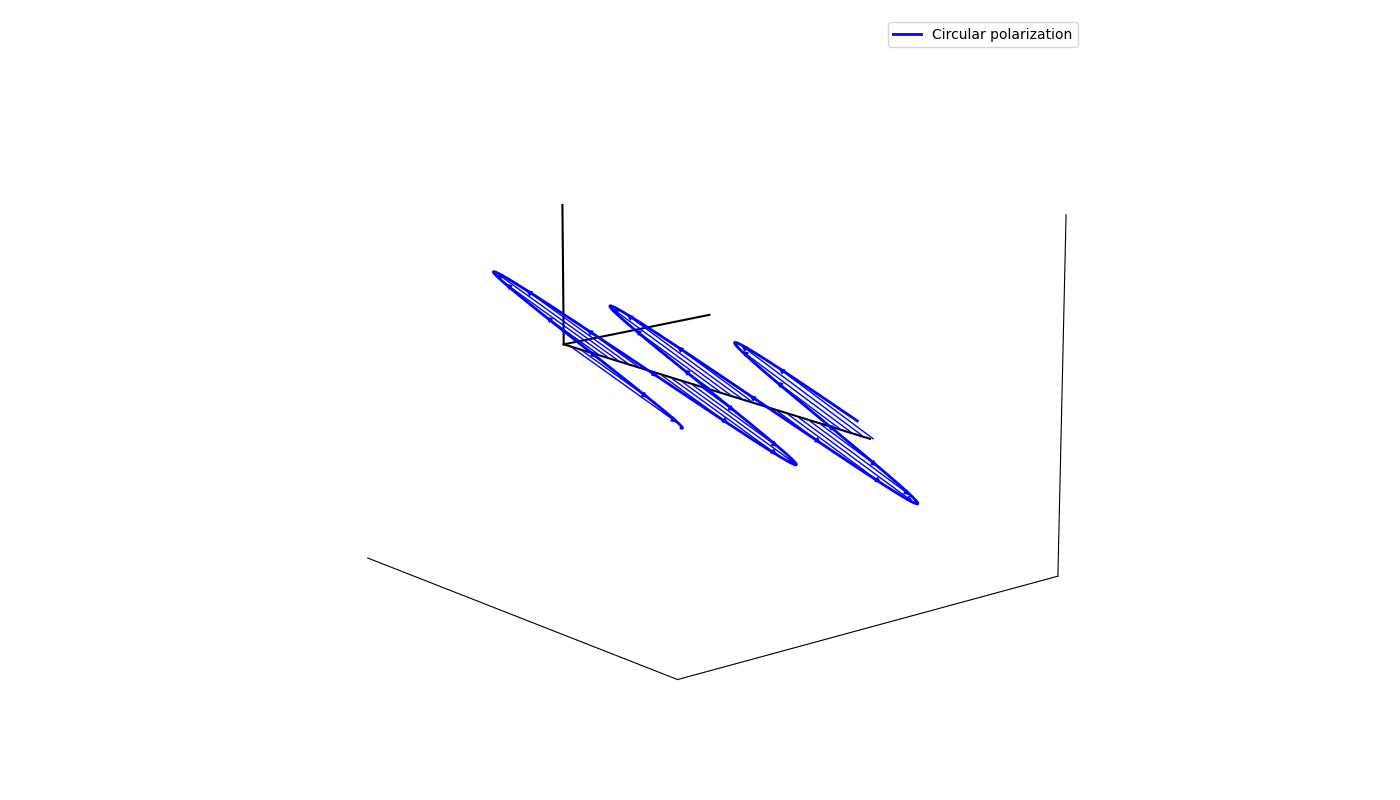

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

# Custom 3D arrow class for better-looking arrows
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)

# Create figure
fig = plt.figure(figsize=(14, 8), facecolor='white')
ax = fig.add_subplot(111, projection='3d')

# Parameters
x = np.linspace(0, 13, 1000)  # Propagation direction (x-axis)
wavelength = 4.8
amplitude = 2.0

# Circular polarization: Electric field rotates in the y-z plane
E_y = amplitude * -0.4*np.cos(2 * np.pi * x / wavelength)
E_z = amplitude * np.cos(2 * np.pi * x / wavelength)

# Plot the propagation axis (x-axis) in green
ax.plot([0, 12.3], [0, 0], [0, 0], color='black', lw=1.5)
ax.plot([0, 0], [0, 2.5], [0, 0], 'k-', lw=1.5)
ax.plot([0, 0], [0, 0], [0, 2.5], 'k-', lw=1.5)

# Plot the helix representing the tip of the electric field vector in green
ax.plot(x, E_y, E_z, color='blue', lw=2, label="Circular polarization")

# Add arrows along the helix for visualization (using 30 arrows)
arrow_positions = np.linspace(0.3, 12.5, 30)
for pos in arrow_positions:
    field_y = amplitude * -0.4*np.cos(2 * np.pi * pos / wavelength)
    field_z = amplitude * np.cos(2 * np.pi * pos / wavelength)
    e_arrow = Arrow3D([pos, pos], [0, field_y], [0, field_z],
                        mutation_scale=8, lw=1, arrowstyle='-|>', color='blue')
    ax.add_artist(e_arrow)

# Set axes limits
ax.set_xlim(0, 12.3)
ax.set_ylim(-amplitude * 1.5, amplitude * 1.5)
ax.set_zlim(-amplitude * 1.5, amplitude * 1.5)

# Remove tick labels and ticks for a clean look
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Remove grid and background panes for a clean style
ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

# Set view angle
ax.view_init(elev=15, azim=-40)
ax.legend()

plt.tight_layout()
# plt.savefig('circular_polarization_wave_green.png', dpi=300, bbox_inches='tight')
plt.show()
